### Introdução à Programação de Computadores - 2020/2

# **Projeto Prático Final** 


Professores:

*   Jefersson Alex dos Santos - jefersson@dcc.ufmg.br
*   João Guilherme Maia de Menezes - jgmm@dcc.ufmg.br

------------------

# Introdução
---------------
Neste projeto realizaremos a manipulação de um grande arquivo de dados reais.
Trata-se de dados e estatísticas sobre economia mineral no Brasil gerados pelo Departamento Nacional de Produção Mineral, vinculado ao Ministério de Minas e Energia. Os dados utilizados estão disponíveis em [www.dnpm.gov.br](http://www.dnpm.gov.br/dnpm/publicacoes/serie-estatisticas-e-economia-mineral/estatisticas-e-economia-mineral "Estatísticas e Economia Mineral")

Mais especificamente, analisamos os dados referentes ao recolhimento do CFEM (Compensação Financeira pela Exploração de Recursos Minerais), acessíveis publicamente [aqui](https://app.dnpm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv).
O CFEM é um imposto pago pelas empresas ou pessoas físicas a União, aos Estados, Distrito Federal e Município pela utilização econômica dos recursos minerais.




Tarefa 0 - Leitura dos dados
---------

**Essa está pronta! :-)**

Na célula abaixo baixamos e implementamos uma função para leitura do arquivo CSV. A função retorna uma lista com os registros dos dados e uma outra lista que corresponde aos rótulos (nome das colunas). Essa função será utilizada nas próximas tarefas.
Depois, a função implementada <code>le_dados</code> é testada imprimindo os rótulos, a primeira linha dos dados e o número total de registros. Também criamos um dicionário <code>reg</code> pra facilitar o acesso aos registros.



In [4]:
# Baixando os dados do site oficial (link alternativo abaixo)
#!wget https://app.dnpm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv

# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo. 
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica. 
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    file = open(filename, 'r', encoding='ISO-8859-1')
    
    # Criando uma lista vazia para armazenar todos os dados do arquivo
    dados = []
    
    # Para cada linha do arquivo, realizamos as seguintes operacoes: 
    # (1) removemos o caractere '\n' do final da linha
    # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
    # (3) removemos as aspas extras
    # (4) transformamos a linha em uma lista
    # (5) adicionamos a lista de itens na lista 'dados'
    for line in file:
        dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
        
    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)
    
    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
rotulos, dados = le_dados("Cfem.csv")

print (rotulos, '\n')
print (dados[0])
print ("Número total de registros: %d" % (len(dados)))

# Criando dicionario pra facilitar acesso aos registros
index = 0
reg = {}
for d in rotulos:
  reg[d] = index
  index=index+1

print(reg)

['Ano de Referencia', 'Mes de Referencia', 'Processo', 'Ano do Processo', 'Tipo PF/PJ', 'CPF/CNPJ', 'Pessoa Física/Jurídica', 'Fase do Processo', 'Substância', 'Uf', 'Município', 'Unidade de Medida', 'Quantidade Comercializada', 'Valor Recolhido (CFEM)'] 

['2002', '6', '', '', 'PF', '***.000.000-**', 'Não Informado', '', '', '', '', '', '', '31']
Número total de registros: 1219475
{'Ano de Referencia': 0, 'Mes de Referencia': 1, 'Processo': 2, 'Ano do Processo': 3, 'Tipo PF/PJ': 4, 'CPF/CNPJ': 5, 'Pessoa Física/Jurídica': 6, 'Fase do Processo': 7, 'Substância': 8, 'Uf': 9, 'Município': 10, 'Unidade de Medida': 11, 'Quantidade Comercializada': 12, 'Valor Recolhido (CFEM)': 13}


Tarefa 1 - Evolução da arrecadação ao longo dos anos
---------

**Agora é com você!** 

Implemente funções para gerar um gráfico de arrecadação do CFEM no Estado de Minas Gerais ao longo dos anos (2003 a 2021 em milhões de reais).



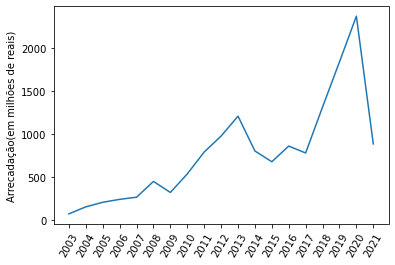

In [5]:
import matplotlib.pyplot as plt
from decimal import Decimal

eixoX  = []
eixoY = []
val = 2003
while val<=2021:
    eixoX.append(val)
    val = val +1

for val in eixoX:
    soma = 0
    for valores in dados:
        if (str(val) in valores[0]) and ('MG' in valores[9]):
            soma = soma + float((valores[13].replace(",",".")))
    
    eixoY.append(round(soma/1000000,0))

#Gráfico 
plt.xticks(eixoX,rotation=60)
plt.plot(eixoX,eixoY)
plt.ylabel('Arrecadação(em milhões de reais)')
plt.show()

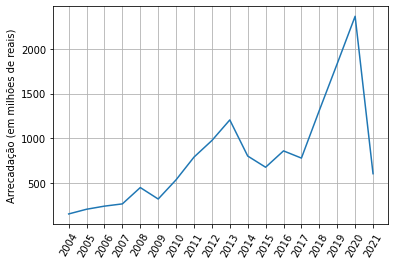

In [ ]:
# Implemente seu código aqui!


Tarefa 2 - Extração de bauxita por estado entre 2015 e 2020
---------

Implemente um código capaz de plotar um gráfico de barras que mostra a extração de bauxita por estado brasileiro entre os anos de 2015 e 2020. 

In [6]:
def semEstadosRepetidos(posEst,posSubs,posAno,substancia,anoIni,anoFim):
    lista = []
    for valores in dados:
        if valores[posEst] not in lista and valores[posSubs]== substancia and valores[posEst]!='' and anoIni<=int(valores[posAno])<=anoFim:
            lista.append(valores[posEst])
    return lista

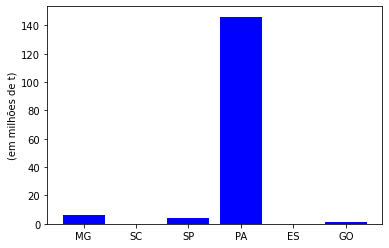

In [7]:
def extracaoSubstancia(estado,posEst,posSubs,posAno,anoIni,anoFim,substancia):
    soma = 0
    for valores in dados:
        if valores[posSubs]== substancia and valores[posEst]==estado and anoIni<=int(valores[posAno])<=anoFim and valores[12]!='':
            soma = soma + float((valores[12].replace(",",".")))
            
    return soma/1000000

eixoY = []
estadosBauxita = []

estadosBauxita = semEstadosRepetidos(9,8,0,'BAUXITA',2015,2020)

for estado in estadosBauxita:
    eixoY.append(extracaoSubstancia(estado,9,8,0,2015,2020,'BAUXITA'))

#Gráfico 
plt.bar(estadosBauxita,eixoY,color = 'blue')
plt.ylabel('(em milhões de t)')
plt.show()

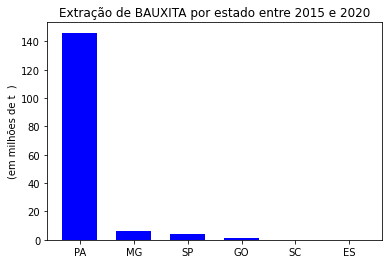

In [ ]:
# Implemente seu código aqui!


Tarefa 3 - Extração de ouro por estado nos últimos dez anos.
---------

Implemente códigos para gerar um gráfico de barras que mostra a extração de ouro (**'OURO'**) por estado nos últimos dez anos completos (de 2010 até 2020) na célula abaixo.
Sugestão: utilize funções implementadas nas tarefas anteriores.

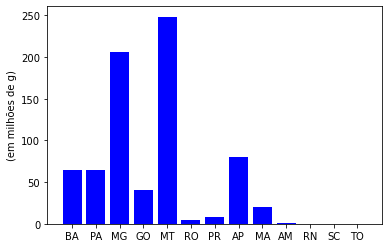

In [8]:
import matplotlib.pyplot as plt
from decimal import Decimal
estadosOuro = []
eixoY = []
estadosOuro = semEstadosRepetidos(9,8,0,'OURO',2010,2020)
for estado in estadosOuro:
    eixoY.append(extracaoSubstancia(estado,9,8,0,2010,2020,'OURO'))

#Gráfico 
plt.bar(estadosOuro,eixoY,color = 'blue')
plt.ylabel('(em milhões de g)')
plt.show()

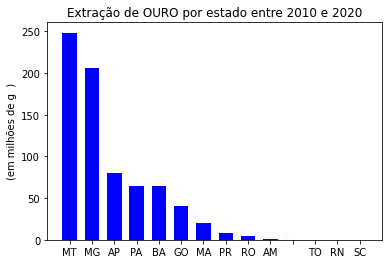

In [ ]:
# Faça seu código da Tarefa 3 aqui



Tarefa 4 - Evolução da extração de FERRO em Minas Gerais e Pará.
---------

Implemente códigos para plotar um gráfico que mostra a evolução da extração de ferro (**'FERRO'**) nos estados de Minas Gerais e Pará (de 1991 até 2019). Sugestão: copie e altere as funções implementadas na Tarefa 1. Utilize as funções que você implementou para plotar o gráfico final.

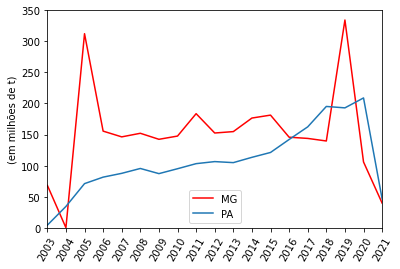

In [9]:
def extracaoSubs(estado,ano,substancia):
    
    soma = 0
    for valores in dados:
        if valores[8]== substancia and valores[9]==estado and ano == int(valores[0]) and valores[12]!='':
            soma = soma + float((valores[12].replace(",",".")))
    
    return soma/1000000

#extracaoSubstancia(estado,posEst,posSubs,posAno,anoIni,anoFim,substancia)

anos = []
extracaoMg = []
extracaoPa = []

for ano in range(1991,2022):
    extracaoMg.append(extracaoSubs('MG',ano,'FERRO'))
    extracaoPa.append(extracaoSubs('PA',ano,'FERRO'))
    anos.append(ano)

#Gráfico 
plt.plot(anos,extracaoMg,color = 'red',label = 'MG')
plt.plot(anos,extracaoPa,label = 'PA')
plt.xticks(anos,rotation=60)
plt.axis([2003, 2021,0,350])
plt.ylabel('(em milhões de t)')
plt.legend()
plt.show()

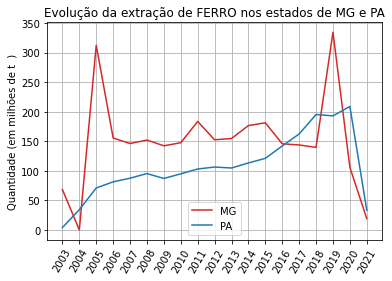

In [ ]:
# Faça seu código da Tarefa 4 aqui



Tarefa 5 - Percentual de arrecadação dos Estados da Região Sul no ano de 2019 por tipo de minério extraído.
---------

Implemente um código para plotar um gráfico de "pizza" que mostra o percentual de arrecadação de cada tipo de minério extraído pelos estados da Região Sul no ano de 2019. Utilize o mesmo código para plotar o mesmo gráfico para o Estado de Minas Gerais.

Sugestão 1: use os exemplos da documentação do matplotlib para fazer o gráfico: [Basic Pie Chart!](http://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py")

Sugestão 2: por questão de visualização, mostre apenas os  minérios mais frequentes e agrupe os menos frequentes em uma categoria "Outros". Seja criativo, as regras para agrupamento ficam a seu critério. =)


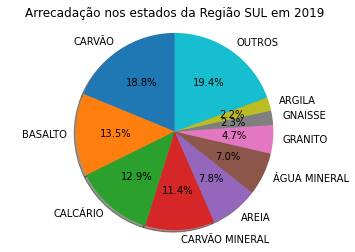

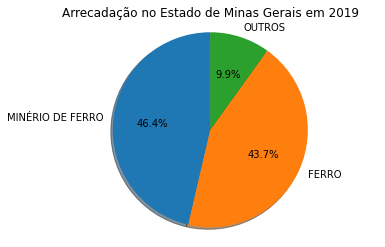

In [ ]:
# Faça seu código da Tarefa 5 aqui


